<a href="https://colab.research.google.com/github/Amitish/Data-Visualization---Tableau/blob/main/Data_Visualization_Tools_Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Data Visualization Tools**    

##### **Project Type**    - Data Visualization Tools
##### **Contribution**    - Individual

# **Project Summary -**

The agenda of this project will be to analyse Airbnb bookings dataset and pull fruitful information out of it. Moreover perform data cleaning, data transformation, chart formation in order to get processed and visually appealing data and charts.


# **Problem Statement**


Extracting useful information from a dataset about a particular property, guest name, room type etc, can be a tedious task. There is a lot of scattered data present in he dataset and finding meaningful information out of it can be a very painful and challenging job, requiring more time and effort. Visually appealing charts will give an aesthetic look and feel to the audience.



### Import Libraries

In [5]:
# Import Libraries

import pandas as pd               # For creating dataset, for reading dataset (pd.read_csv) or writing final prepared/clean dataset to new location (pd.to_csv)
import numpy as np                # For applying some useful methods on dataset like sum(), mean(), count() etc.


### Dataset Loading

In [6]:
# Load Dataset

from google.colab import drive                                    # Links the Google drive with Colab notebook, so that we could extract the desired dataset
drive.mount("/content/drive")

data = pd.read_csv("/content/drive/MyDrive/Airbnb NYC 2019.csv")  # Fetches the dataset from drive and saves into data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# In case accessing the dataset saved on the system itself

#data = pd.read_excel("/content/Airbnb NYC - Dataset.xlsx")

In [8]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# Duplicates Count

duplicates = data.duplicated().value_counts()  # calculate duplicates in entire dataset
duplicates

False    48895
dtype: int64

In [ ]:
# Missing Values/Null Values Count

new = data.isnull().sum().reset_index()              # Presents data of all the null values associated with particular columns
new

,index,0
0,id,0
1,name,16
2,host_id,0
3,host_name,21
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


In [ ]:
# Data Wrangling/Cleaning

data.drop_duplicates(inplace = True)                        # This removes duplicate rows if any, which in turn eliminates data duplicacy

data.fillna({"reviews_per_month": 0}, inplace = True)       # We will fill all NaN with 0 as it doesn't have any review in few of the months

data.fillna({"last_review": 0}, inplace = True)            # We will fill all NaN with 0

data["name"].fillna("unknown", inplace = True )             # We will replace NaN with "unknown"

data["host_name"].fillna("unknown", inplace = True)         # We will replace NaN with "unknown"

avg = data["price"].mean()                                  # We will replace the property priced at 0 with average price, since proprty can't be available for free

data["price"].replace(0, avg.mean(), inplace = True)

In [ ]:
final = data.isnull().sum().reset_index()                   # Cross validate if cleaning has been done successfully
final

,index,0
0,id,0
1,name,0
2,host_id,0
3,host_name,0
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


In [ ]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0,0.00,6,2


In [ ]:
from google.colab import files
data.to_csv('AirBnB Visual.csv', encoding = 'utf-8-sig')
files.download('AirBnB Visual.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LINK TO TABLEAU DASHBOARD : https://public.tableau.com/app/profile/amit.bisht5121/vizzes

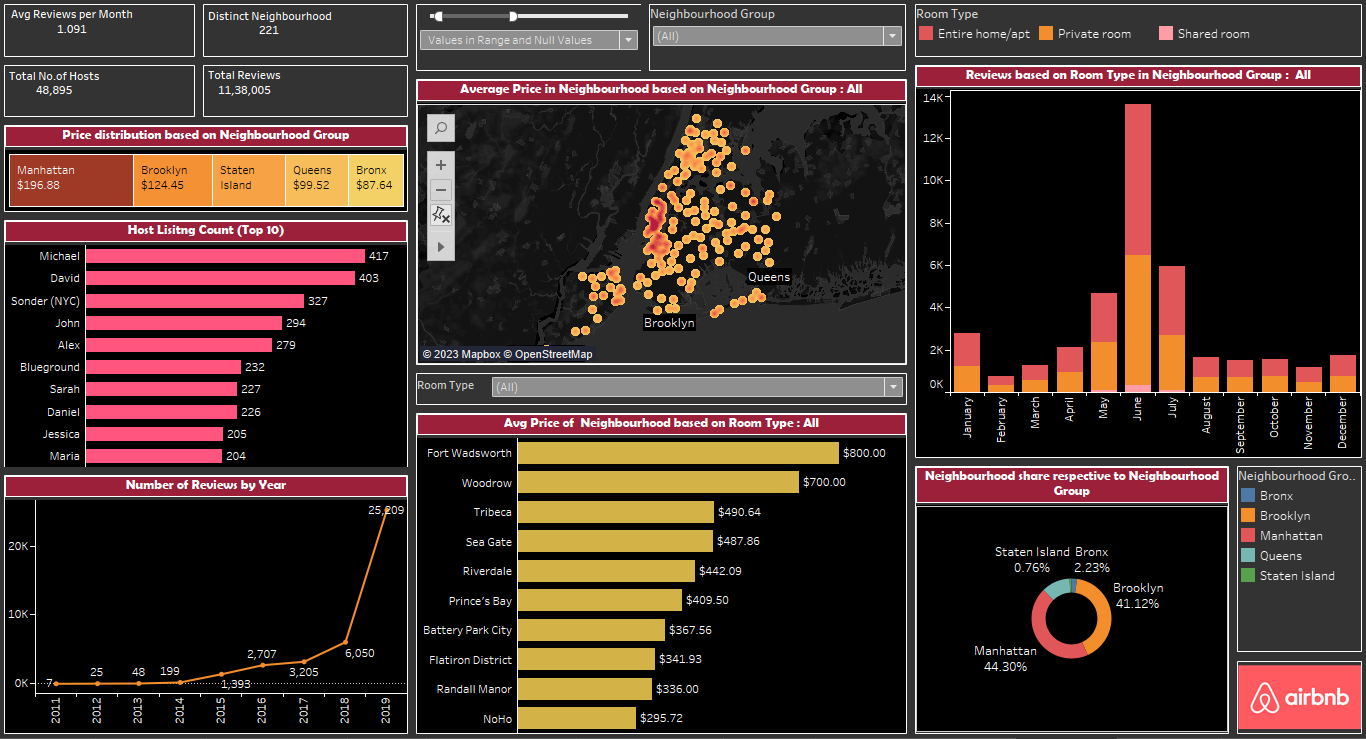

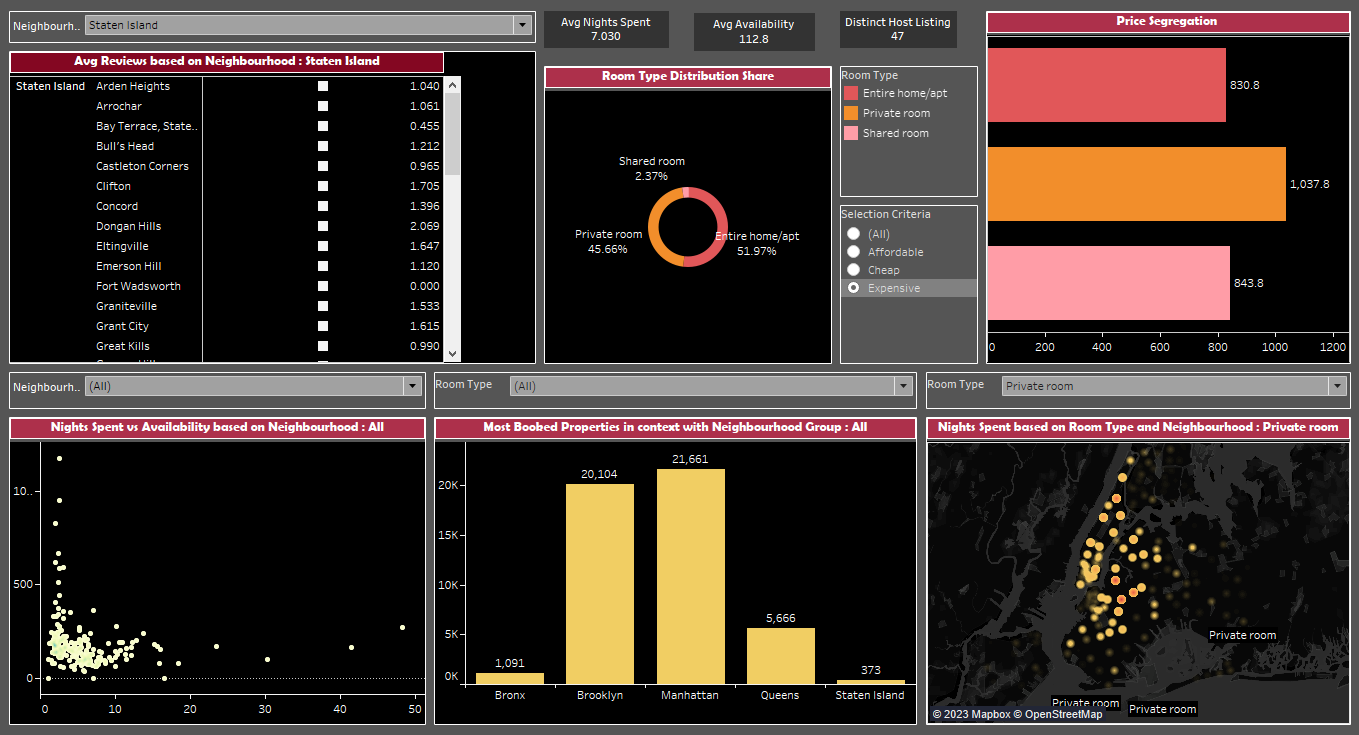